In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plotting style
sns.set(style="whitegrid")

# ==============================
# Folder containing all CSVs
# ==============================
folder_path = "C:/Users/aathan01/OneDrive - dentsu/Desktop/DGS IMP Folder/DV Team/SQL+Python+Power BI Projects/Sales Ecommerce Project/Target Sales Dataset"

In [2]:
# Automatically read all CSVs in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
dfs = {}
for f in csv_files:
    table_name = os.path.splitext(f)[0].lower()
    dfs[table_name] = pd.read_csv(os.path.join(folder_path, f))

# Shortcut variables
customers = dfs.get("customers")
orders = dfs.get("orders")
order_items = dfs.get("order_items")
payments = dfs.get("payments")
products = dfs.get("products")
sellers = dfs.get("sellers")
geolocation = dfs.get("geolocation")

In [3]:
time_cols = ['order_purchase_timestamp', 'order_approved_at', 
             'order_delivered_carrier_date', 'order_delivered_customer_date', 
             'order_estimated_delivery_date']

for col in time_cols:
    if col in orders.columns:
        orders[col] = pd.to_datetime(orders[col])

Python EDA - Beginner Level

In [4]:
# 1. Unique customer cities
unique_cities = customers['customer_city'].dropna().unique()
print("Unique customer cities:", unique_cities)

Unique customer cities: ['franca' 'sao bernardo do campo' 'sao paulo' ... 'monte bonito'
 'sao rafael' 'eugenio de castro']


In [5]:
# 2. Orders in 2017
orders_2017 = orders[orders['order_purchase_timestamp'].dt.year == 2017]
print("Total orders in 2017:", len(orders_2017))

Total orders in 2017: 45101


In [6]:
# 3. Total sales per category
order_items_products = order_items.merge(products, on='product_id', how='left')
order_items_products['total_price'] = order_items_products['price'] + order_items_products['freight_value']
sales_per_category = order_items_products.groupby('product category')['total_price'].sum().sort_values(ascending=False)
print("Total sales per category:\n", sales_per_category)

Total sales per category:
 product category
HEALTH BEAUTY                  1441248.07
Watches present                1305541.61
bed table bath                 1241681.72
sport leisure                  1156656.48
computer accessories           1059272.40
                                  ...    
flowers                           1598.91
House Comfort 2                   1170.58
cds music dvds                     954.99
Fashion Children's Clothing        665.36
insurance and services             324.51
Name: total_price, Length: 73, dtype: float64


In [7]:
# 4. Percentage of orders paid in installments
orders_with_installments = payments[payments['payment_installments'] > 1]['order_id'].nunique()
total_orders = payments['order_id'].nunique()
installment_percentage = round(100 * orders_with_installments / total_orders, 2)
print("Percentage of orders paid in installments:", installment_percentage)

Percentage of orders paid in installments: 51.46


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
dtype: int64


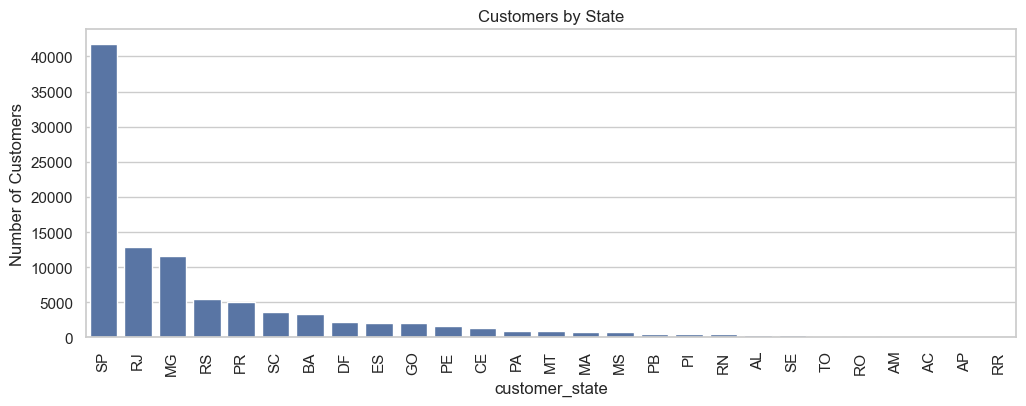

In [8]:
# 5. Customers per state
customers_per_state = customers.groupby('customer_state').size().sort_values(ascending=False)
print(customers_per_state)
plt.figure(figsize=(12,4))
sns.barplot(x=customers_per_state.index, y=customers_per_state.values)
plt.xticks(rotation=90)
plt.title("Customers by State")
plt.ylabel("Number of Customers")
plt.show()

Python EDA - Intermediate Level

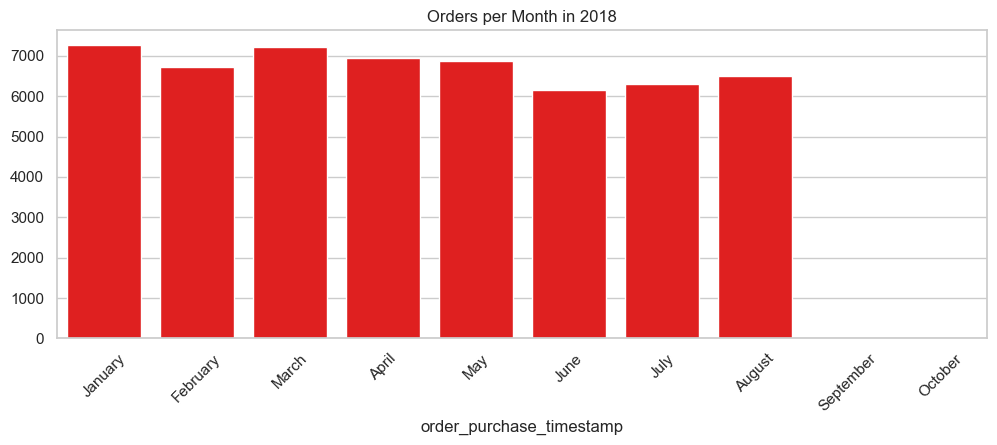

In [9]:
# 1. Orders per month in 2018
orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018]
orders_per_month = orders_2018.groupby(orders_2018['order_purchase_timestamp'].dt.month).size()
orders_per_month.index = orders_per_month.index.map(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
plt.figure(figsize=(12,4))
sns.barplot(x=orders_per_month.index, y=orders_per_month.values, color="red")
plt.xticks(rotation=45)
plt.title("Orders per Month in 2018")
plt.show()

In [10]:
# 2. Average products per order by customer city
order_counts = order_items.groupby('order_id').size().reset_index(name='product_count')
orders_with_customers = orders[['order_id','customer_id']].merge(customers[['customer_id','customer_city']], on='customer_id')
order_counts = order_counts.merge(orders_with_customers, on='order_id')
avg_products_per_city = order_counts.groupby('customer_city')['product_count'].mean().apply(np.ceil).sort_values(ascending=False)
print(avg_products_per_city.head(10))

customer_city
celso ramos           7.0
padre carvalho        7.0
candido godoi         6.0
datas                 6.0
matias olimpio        5.0
ipua                  4.0
inconfidentes         4.0
cidelandia            4.0
curralinho            4.0
morro de sao paulo    4.0
Name: product_count, dtype: float64


In [11]:
# 3. Percentage revenue per product category
revenue_per_category = order_items_products.groupby('product category')['total_price'].sum()
revenue_percentage = round(100 * revenue_per_category / revenue_per_category.sum(), 2)
print(revenue_percentage)

product category
Agro Industria e Comercio    0.50
Art                          0.18
Arts and Crafts              0.01
Bags Accessories             1.09
Blu Ray DVDs                 0.05
                             ... 
sport leisure                7.40
stationary store             1.78
technical books              0.15
telephony                    2.53
toys                         3.59
Name: total_price, Length: 73, dtype: float64


In [12]:
# 4. Correlation between product price and purchase count
product_stats = order_items.groupby('product_id').agg(avg_price=('price','mean'), purchase_count=('order_item_id','count')).reset_index()
correlation = product_stats['avg_price'].corr(product_stats['purchase_count'])
print("Correlation between product price and purchase count:", correlation)

Correlation between product price and purchase count: -0.032139862680945167


seller_id
7c67e1448b00f6e969d365cea6b010ab    507166.91
1025f0e2d44d7041d6cf58b6550e0bfa    308222.04
4a3ca9315b744ce9f8e9374361493884    301245.27
1f50f920176fa81dab994f9023523100    290253.42
53243585a1d6dc2643021fd1853d8905    284903.08
da8622b14eb17ae2831f4ac5b9dab84a    272219.32
4869f7a5dfa277a7dca6462dcf3b52b2    264166.12
955fee9216a65b617aa5c0531780ce60    236322.30
fa1c13f2614d7b5c4749cbc52fecda94    206513.23
7e93a43ef30c4f03f38b393420bc753a    185134.21
Name: payment_value, dtype: float64


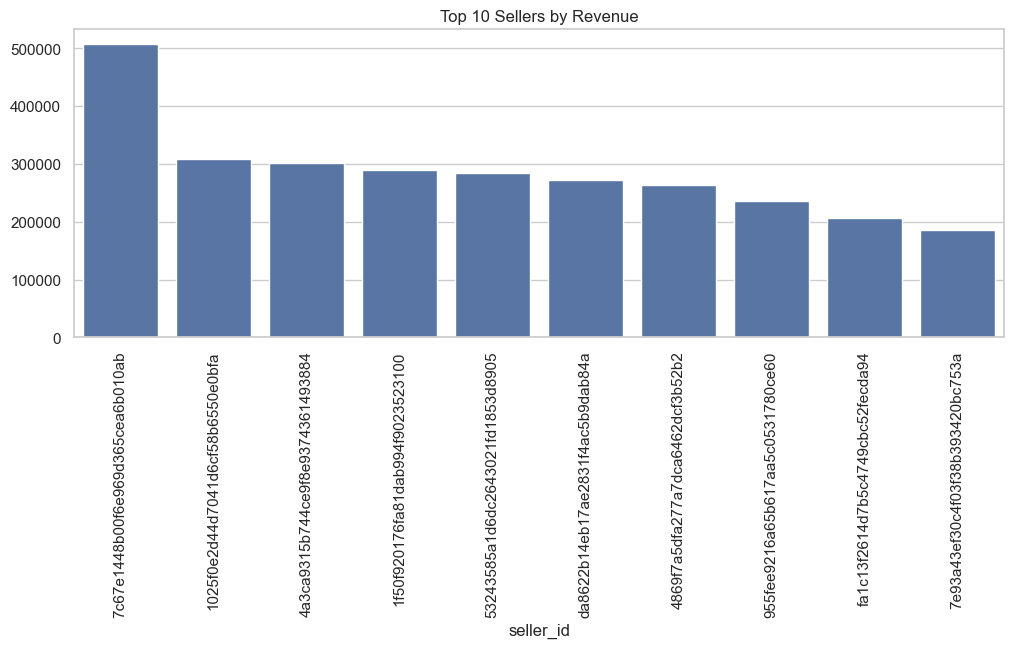

In [13]:
# 5. Total revenue per seller
revenue_per_seller = order_items.merge(payments, on='order_id').groupby('seller_id')['payment_value'].sum().sort_values(ascending=False)
print(revenue_per_seller.head(10))
plt.figure(figsize=(12,4))
sns.barplot(x=revenue_per_seller.head(10).index, y=revenue_per_seller.head(10).values)
plt.xticks(rotation=90)
plt.title("Top 10 Sellers by Revenue")
plt.show()

Python EDA - Advanced Level

In [14]:
# 1. Moving average of order values per customer
order_values = order_items.merge(orders[['order_id','customer_id','order_purchase_timestamp']], on='order_id')
order_values['total_price'] = order_values['price'] + order_values['freight_value']
customer_orders = order_values.groupby(['customer_id','order_id','order_purchase_timestamp'])['total_price'].sum().reset_index()
customer_orders = customer_orders.sort_values(['customer_id','order_purchase_timestamp'])
customer_orders['moving_avg'] = customer_orders.groupby('customer_id')['total_price'].rolling(3, min_periods=1).mean().reset_index(0,drop=True)
print(customer_orders.head())

                        customer_id                          order_id  \
0  00012a2ce6f8dcda20d059ce98491703  5f79b5b0931d63f1a42989eb65b9da6e   
1  000161a058600d5901f007fab4c27140  a44895d095d7e0702b6a162fa2dbeced   
2  0001fd6190edaaf884bcaf3d49edf079  316a104623542e4d75189bb372bc5f8d   
3  0002414f95344307404f0ace7a26f1d5  5825ce2e88d5346438686b0bba99e5ee   
4  000379cdec625522490c315e70c7a9fb  0ab7fb08086d4af9141453c91878ed7a   

  order_purchase_timestamp  total_price  moving_avg  
0      2017-11-14 16:08:26       114.74      114.74  
1      2017-07-16 09:40:32        67.41       67.41  
2      2017-02-28 11:06:43       195.42      195.42  
3      2017-08-16 13:09:20       179.35      179.35  
4      2018-04-02 13:42:17       107.01      107.01  


In [15]:
# 2. Cumulative sales per month
order_values['year_month'] = order_values['order_purchase_timestamp'].dt.to_period('M')
monthly_sales = order_values.groupby('year_month')['total_price'].sum().cumsum()
print(monthly_sales.head())

year_month
2016-09       354.75
2016-10     57163.59
2016-12     57183.21
2017-01    194371.70
2017-02    480652.32
Freq: M, Name: total_price, dtype: float64


In [16]:
# 3. Year-over-year growth
yearly_sales = order_values.groupby(order_values['order_purchase_timestamp'].dt.year)['total_price'].sum()
yoy_growth = yearly_sales.pct_change().fillna(0).apply(lambda x: round(x*100,2))
print("YoY growth %:\n", yoy_growth)

YoY growth %:
 order_purchase_timestamp
2016        0.00
2017    12390.86
2018       21.01
Name: total_price, dtype: float64


In [17]:
# 4. Retention rate (customers purchasing again within 6 months)
first_purchase = orders.groupby('customer_id')['order_purchase_timestamp'].min().reset_index(name='first_order')
repeat_purchase = orders.merge(first_purchase, on='customer_id')
repeat_purchase = repeat_purchase[(repeat_purchase['order_purchase_timestamp'] > repeat_purchase['first_order']) &
                                  (repeat_purchase['order_purchase_timestamp'] <= repeat_purchase['first_order'] + pd.DateOffset(months=6))]
retention_rate = round(100 * repeat_purchase['customer_id'].nunique() / customers['customer_id'].nunique(), 2)
print("Customer retention rate (6 months):", retention_rate)

Customer retention rate (6 months): 0.0


   year                       customer_id  total_price
0  2016  a9dc96b027d1252bbac0a9b72d837fc6      1423.55
1  2016  1d34ed25963d5aae4cf3d7f3a4cda173      1400.74
2  2016  4a06381959b6670756de02e07b83815f      1227.78
3  2017  1617b1357756262bfa56ab541c47bc16     13664.08
4  2017  c6e2731c5b391845f6800c97401a43a9      6929.31
5  2017  3fd6777bbce08a352fddd04e4a7cc8f6      6726.66
6  2018  ec5b2ba62e574342386871631fafd3fc      7274.88
7  2018  f48d464a0baaea338cb25f816991ab1f      6922.21
8  2018  e0a2412720e9ea4f26c1ac985f6a7358      4809.44


C:\Users\aathan01\AppData\Local\Temp\ipykernel_7120\440565010.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_customers = customer_yearly.groupby('year').apply(lambda x: x.nlargest(3,'total_price')).reset_index(drop=True)


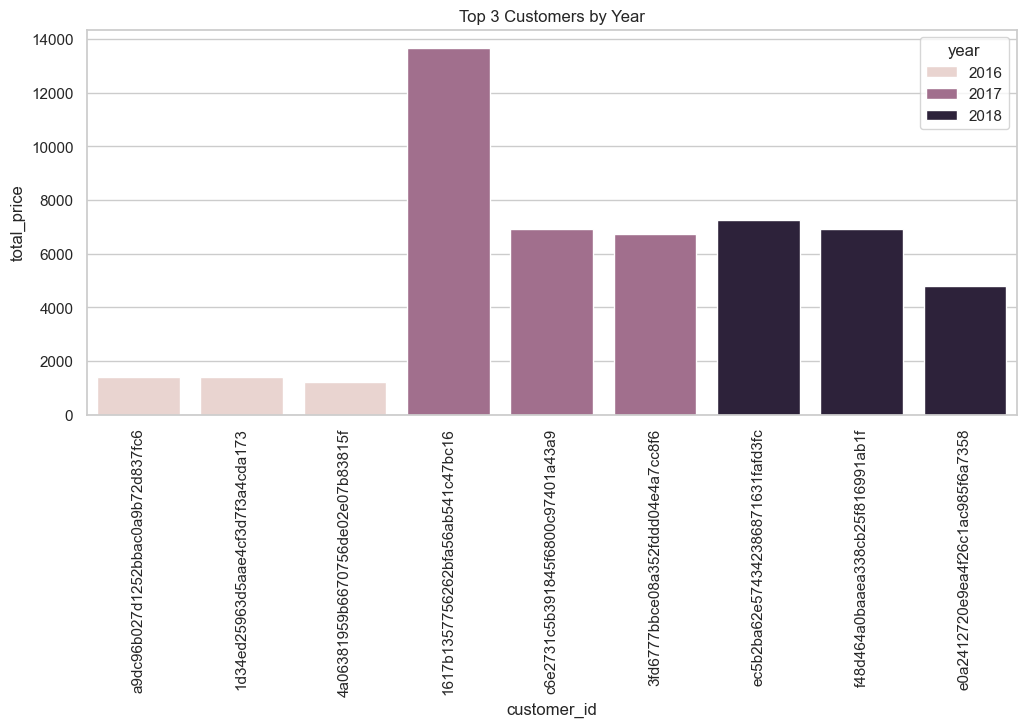

In [18]:
# 5. Top 3 customers by spending each year
order_values['year'] = order_values['order_purchase_timestamp'].dt.year
customer_yearly = order_values.groupby(['year','customer_id'])['total_price'].sum().reset_index()
top_customers = customer_yearly.groupby('year').apply(lambda x: x.nlargest(3,'total_price')).reset_index(drop=True)
print(top_customers)
plt.figure(figsize=(12,5))
sns.barplot(x="customer_id", y="total_price", hue="year", data=top_customers)
plt.xticks(rotation=90)
plt.title("Top 3 Customers by Year")
plt.show()